<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitbit_V02_Regression_2023_06_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import seaborn as sns
import sklearn.metrics as sm


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )


  """sns.set(rc={'figure.figsize':(12,10)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )"""

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


def sub_wise_splt(df,col,flage):
  total_count = len(set(df[col]))
  subjects=sorted(set(df[col]))

  train_axis = []
  test_axis = []

  count = 0

  for i in subjects:
    if count <= flage:
      train_axis.append(df.query(col+" == '"+i+"'"))
    else:
      test_axis.append(df.query(col+" == '"+i+"'"))
    count+=1

  return pd.concat(train_axis, axis=0).reset_index(drop = True),pd.concat(test_axis, axis=0).reset_index(drop = True)


In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Fitbit_feature_merged_version_2023.06.20_ST-II&ST-V_Pre.csv")
dataset = pd.read_excel("/content/Fitbit_feature_merged_version_2023.06.29_SPO2_wo_missing column.xlsx")
#dataset=pd.read_excel("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.29_SPO2_wo_missing column.xlsx")

target = "DASI - VO2 peak score:"

In [20]:
dataset.head(10)

,Subject,Condition,Activity,Epoch Duration(min),Epoch,nni_counter,nni_mean,nni_min,nni_max,hr_mean,...,Gastrointestinal:.1,Cardiovascular:.1,Neruological:,Wound:.1,Hematological:.1,Pain:.1,Complete?,Has this CRF been quality checked,Date CRF was last checked:,Complete?.1
0,002-JR,post,Light,10,1,69,762.275362,731,810,78.784007,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete
1,002-JR,post,Light,10,100,73,687.876712,638,740,87.334350,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete
2,002-JR,post,Light,10,101,78,585.282051,545,645,102.611992,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete
3,002-JR,post,Light,10,102,66,603.772727,582,645,99.417782,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete
4,002-JR,post,Light,10,103,87,607.206897,555,740,99.222786,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete
5,002-JR,post,Light,10,104,69,673.130435,638,740,89.201360,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete
6,002-JR,post,Light,10,105,65,653.092308,625,722,92.003173,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete
7,002-JR,post,Light,10,106,72,613.986111,576,674,97.842853,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete
8,002-JR,post,Light,10,107,75,632.466667,600,714,94.975528,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete
9,002-JR,post,Light,10,108,65,644.369231,625,659,93.128287,...,No,No,No,No,No,No,Complete,Yes,2023-05-15,Complete


In [5]:
dataset.dropna(axis=0, how='any', inplace = True)
dataset = dataset.reset_index(drop=True)


In [6]:
dataset.shape

(5257, 368)



---



---



#Split Dataset into pre and post

In [28]:
pre_dataset = dataset.query("Condition == 'pre'").reset_index(drop=True)
post_dataset = dataset.query("Condition == 'post'").reset_index(drop=True)

#Custom Spliting

In [26]:
num_of_train_sub = 15

train,test = sub_wise_splt(dataset,"Subject",num_of_train_sub)

In [17]:
train.shape

(4339, 368)

In [18]:
test.shape

(918, 368)

In [19]:
X_train = train.iloc[:,6:116]
X_train = X_train.loc[:, X_train.columns != "aEE_MAX(kJ/min)"]
y_train = train[target]

X_test = test.iloc[:,6:116]
X_test = X_test.loc[:, X_test.columns != "aEE_MAX(kJ/min)"]
y_test = test[target]



---



---



In [ ]:
X = dataset.iloc[:,6:116]

In [ ]:
X

,nni_mean,nni_min,nni_max,hr_mean,hr_min,hr_max,hr_std,nni_diff_mean,nni_diff_max,sdnn,...,1_min_HR_Recovery(mean),1_min_HR_Recovery(stdev),2_min_HR_Recovery(mean),2_min_HR_Recovery(stdev),3_min_HR_Recovery(mean),3_min_HR_Recovery(stdev),4_min_HR_Recovery(mean),4_min_HR_Recovery(stdev),5_min_HR_Recovery(mean),5_min_HR_Recovery(stdev)
0,762.275362,731,810,78.784007,74.074074,82.079343,2.399731,7.970588,69,23.309228,...,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988
1,687.876712,638,740,87.334350,81.081081,94.043887,3.126509,8.805556,21,24.429004,...,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988
2,585.282051,545,645,102.611992,93.023256,110.091743,3.158249,8.571429,30,18.284830,...,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988
3,603.772727,582,645,99.417782,93.023256,103.092784,2.055189,6.953846,44,12.726466,...,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988
4,607.206897,555,740,99.222786,81.081081,108.108108,6.213326,9.441860,36,40.628532,...,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988,4.01,4.299988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,682.727273,638,722,87.934633,83.102493,94.043887,2.159835,8.394737,48,16.605038,...,3.40,3.241399,3.40,3.241399,3.40,3.241399,3.40,3.241399,3.40,3.241399
5253,647.273973,550,714,92.985805,84.033613,109.090909,5.373558,7.402778,30,35.464873,...,3.40,3.241399,3.40,3.241399,3.40,3.241399,3.40,3.241399,3.40,3.241399
5254,680.418919,638,714,88.245339,84.033613,94.043887,2.410607,5.958904,21,18.425717,...,3.40,3.241399,3.40,3.241399,3.40,3.241399,3.40,3.241399,3.40,3.241399
5255,709.109589,594,750,84.810075,80.000000,101.010101,4.285204,6.361111,25,33.116193,...,3.40,3.241399,3.40,3.241399,3.40,3.241399,3.40,3.241399,3.40,3.241399


In [ ]:
X = dataset.iloc[:,6:116]
X = X.loc[:, X.columns != "aEE_MAX(kJ/min)"]
y = dataset.iloc[:, 184]

In [ ]:
set(X)

{'1_min_HR_Recovery(mean)',
 '1_min_HR_Recovery(stdev)',
 '2_min_HR_Recovery(mean)',
 '2_min_HR_Recovery(stdev)',
 '3_min_HR_Recovery(mean)',
 '3_min_HR_Recovery(stdev)',
 '4_min_HR_Recovery(mean)',
 '4_min_HR_Recovery(stdev)',
 '5_min_HR_Recovery(mean)',
 '5_min_HR_Recovery(stdev)',
 'HR_MAX(BPM)',
 'ar_abs_high',
 'ar_abs_low',
 'ar_abs_medium',
 'ar_bands_hf_max',
 'ar_bands_hf_min',
 'ar_bands_lf_max',
 'ar_bands_lf_min',
 'ar_bands_vlf_max',
 'ar_bands_vlf_min',
 'ar_log_high',
 'ar_log_low',
 'ar_log_medium',
 'ar_nfft',
 'ar_norm_high',
 'ar_norm_low',
 'ar_order',
 'ar_peak_high',
 'ar_peak_low',
 'ar_peak_medium',
 'ar_ratio',
 'ar_rel_high',
 'ar_rel_low',
 'ar_rel_medium',
 'ar_resampling_frequency',
 'ar_total',
 'dfa_alpha1',
 'dfa_alpha2',
 'ellipse_area',
 'fft_abs_high',
 'fft_abs_low',
 'fft_abs_medium',
 'fft_bands_hf_max',
 'fft_bands_hf_min',
 'fft_bands_lf_max',
 'fft_bands_lf_min',
 'fft_bands_vlf_max',
 'fft_bands_vlf_min',
 'fft_log_high',
 'fft_log_low',
 'fft_

In [ ]:
set(y)

{7.7, 20.0, 20.01, 21.94, 22.6, 23.4, 24.52, 25.7, 28.8, 31.4, 34.63}

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
column_name = 'DASI - VO2 peak score:'
column_index = dataset.columns.get_loc(column_name)
column_index

184

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)


list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])


X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 184]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 41 42 43 65 66 72 74 88 89 90] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Number Of Best Features: 35
                        Specs       Score
98                HR_MAX(BPM)  285.195679
100  1_min_HR_Recovery(stdev)  126.171901
102  2_min_HR_Recovery(stdev)  126.171901
104  3_min_HR_Recovery(stdev)  126.171901
106  4_min_HR_Recovery(stdev)  126.171901
108  5_min_HR_Recovery(stdev)  126.171901
99    1_min_HR_Recovery(mean)   92.021787
101   2_min_HR_Recovery(mean)   92.021787
103   3_min_HR_Recovery(mean)   92.021787
105   4_min_HR_Recovery(mean)   92.021787
107   5_min_HR_Recovery(mean)   92.021787
60              lomb_log_high   41.382359
82              ar_log_medium   38.374767
83                ar_log_high   37.524887
76              ar_abs_medium   37.358993
87                   ar_total   37.003016
81                 ar_log_low   36.906805
1                     nni_min   36.861410
75                 ar_abs_low   36.387327
77                ar_abs_high   36.267838
0                    nni_mean   35.807692
3                     hr_mean   34.927330
5     

In [ ]:
X_new.shape

(5257, 35)

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)




---



In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

#Decision Trees

In [ ]:
dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.003)
dtree.fit(X_train, y_train)

pred_train= dtree.predict(X_train)
print("Trainng Result")
res(y_train,pred_train)

print()

pred_test= dtree.predict(X_test)
print("Trainng Result")
res(y_test,pred_test)

Trainng Result
Mean absolute error = 3.04
Mean squared error = 20.77
Median absolute error = 2.54
Explain variance score = 0.46
R2 score = 0.46

Trainng Result
Mean absolute error = 2.97
Mean squared error = 20.2
Median absolute error = 2.54
Explain variance score = 0.5
R2 score = 0.5


In [ ]:

"""for i in range(1,1000):
  l=i/1000
  print("------------------------------------------------------")
  dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=l)
  dtree.fit(X_train, y_train)
  pred_test_tree= dtree.predict(X_test)
  k = r2_score(y_test, pred_test_tree)
  if k>0:
    print(k,l)"""

'for i in range(1,1000):\n  l=i/1000\n  print("------------------------------------------------------")\n  dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=l)\n  dtree.fit(X_train, y_train)\n  pred_test_tree= dtree.predict(X_test)\n  k = r2_score(y_test, pred_test_tree)\n  if k>0:\n    print(k,l)'

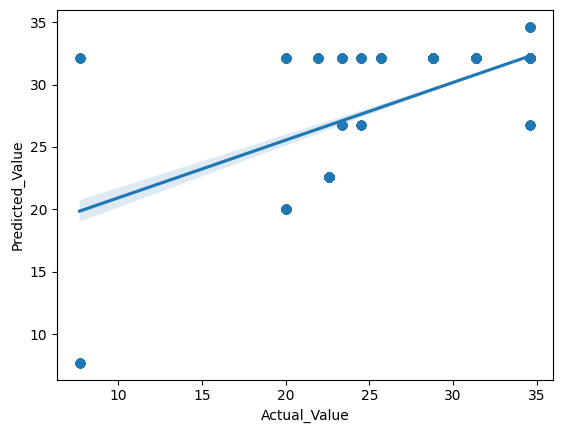

In [ ]:
prim_plot(y_train,pred_train)

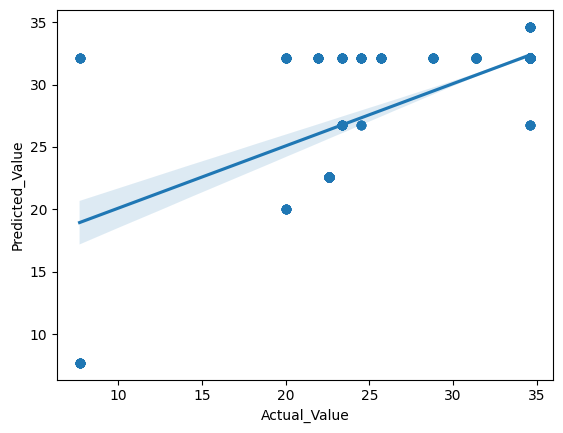

In [ ]:
prim_plot(y_test,pred_test)

#Random Forest (or Bootstrap Aggregation)

In [ ]:
#RF model
model_rf = RandomForestRegressor(n_estimators=700, oob_score=True)
model_rf.fit(X_train, y_train)

print("Training")
pred_train= model_rf.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test = model_rf.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.01
Mean squared error = 0.01
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0
Testing
Mean absolute error = 0.03
Mean squared error = 0.07
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


In [ ]:
"""
for i in range(700,3000,100):
  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)
  model_rf.fit(X_train, y_train)
  pred_test_rf= model_rf.predict(X_test)
  k = r2_score(y_test, pred_test_rf)
  if k>0:
    print("------------------------------------------------------")
    print(k,i)"""

'\nfor i in range(700,3000,100):\n  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)\n  model_rf.fit(X_train, y_train)\n  pred_test_rf= model_rf.predict(X_test)\n  k = r2_score(y_test, pred_test_rf)\n  if k>0:\n    print("------------------------------------------------------")\n    print(k,i)'

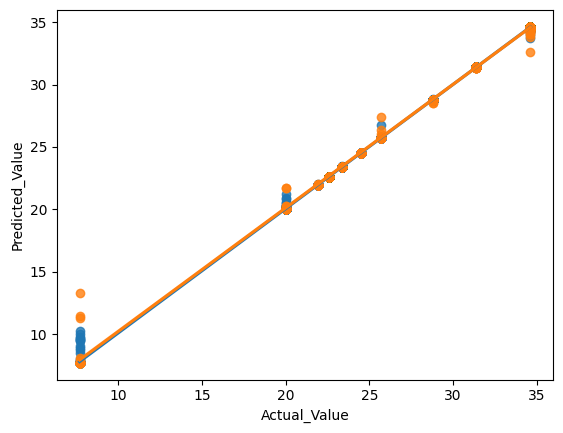

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)

poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)





print("Training")
pred_train= lin2.predict(X_poly_train)
res(y_train,pred_train)

print("Testing")
X_poly_test = poly.fit_transform(X_test)
pred_test= lin2.predict(X_poly_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.04
Mean squared error = 0.0
Median absolute error = 0.03
Explain variance score = 1.0
R2 score = 1.0
Testing
Mean absolute error = 253.07
Mean squared error = 16576060.4
Median absolute error = 11.55
Explain variance score = -408299.38
R2 score = -408425.08


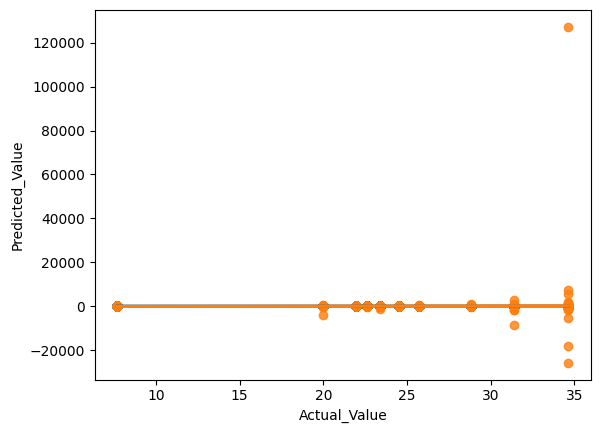

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Kernel Ridge

In [ ]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)


print("Training")
pred_train= krr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= krr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 4.68
Mean squared error = 34.54
Median absolute error = 4.55
Explain variance score = 0.11
R2 score = 0.11
Testing
Mean absolute error = 4.77
Mean squared error = 35.94
Median absolute error = 4.52
Explain variance score = 0.11
R2 score = 0.11


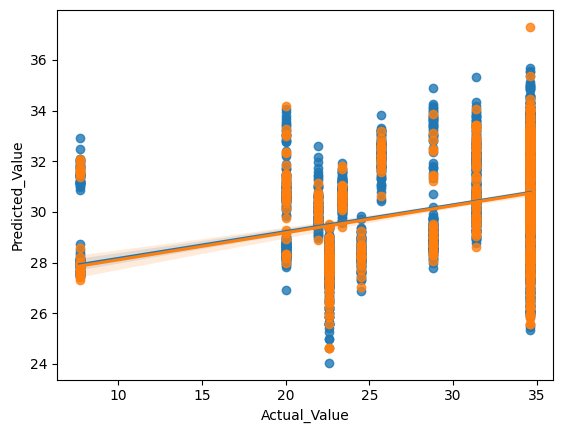

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 3.33
Mean squared error = 30.83
Median absolute error = 1.55
Explain variance score = 0.28
R2 score = 0.2
Testing
Mean absolute error = 3.49
Mean squared error = 34.07
Median absolute error = 1.78
Explain variance score = 0.24
R2 score = 0.16


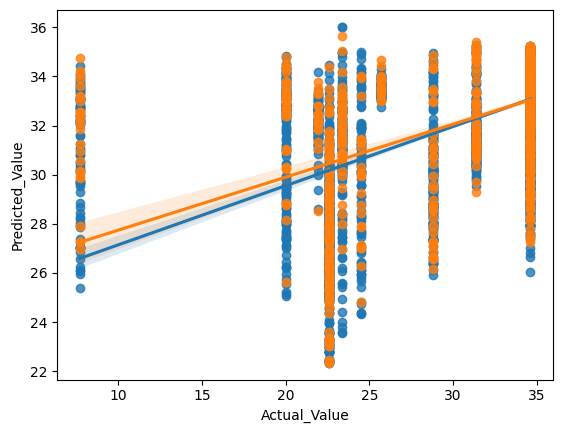

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Lasso

In [ ]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 4.71
Mean squared error = 34.7
Median absolute error = 4.61
Explain variance score = 0.1
R2 score = 0.1
Testing
Mean absolute error = 4.8
Mean squared error = 36.07
Median absolute error = 4.53
Explain variance score = 0.11
R2 score = 0.11


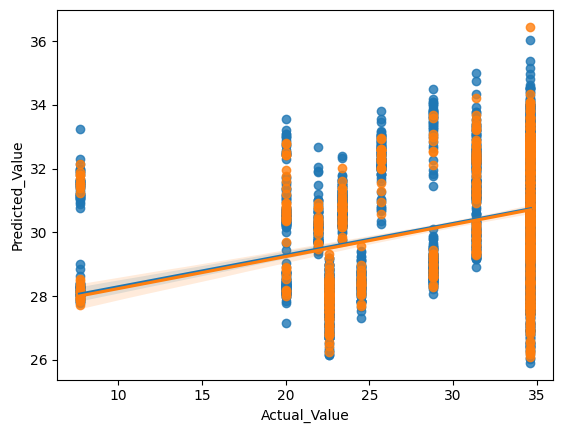

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#ANN Regression

Text(0.5, 1.0, 'ST-II Max-Min Difference')

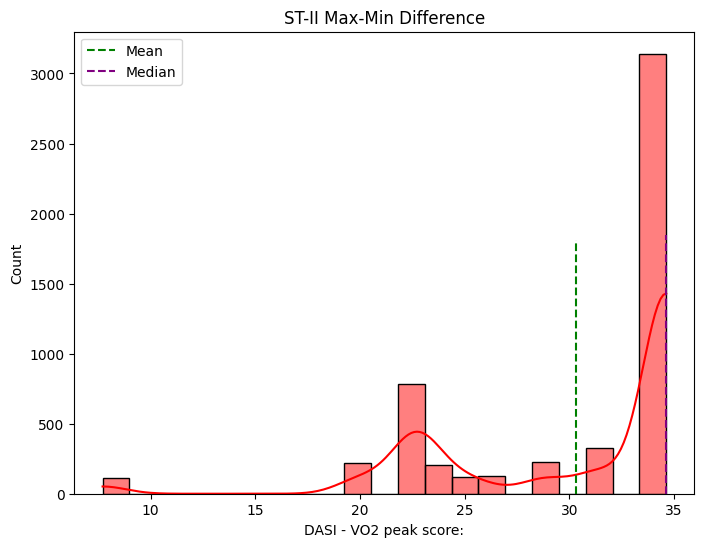

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset,x=target,color="red",kde=True)
plt.axvline(x=dataset[target].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=dataset[target].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("ST-II Max-Min Difference")

Text(0.5, 1.0, 'Cumulative of the Target Column')

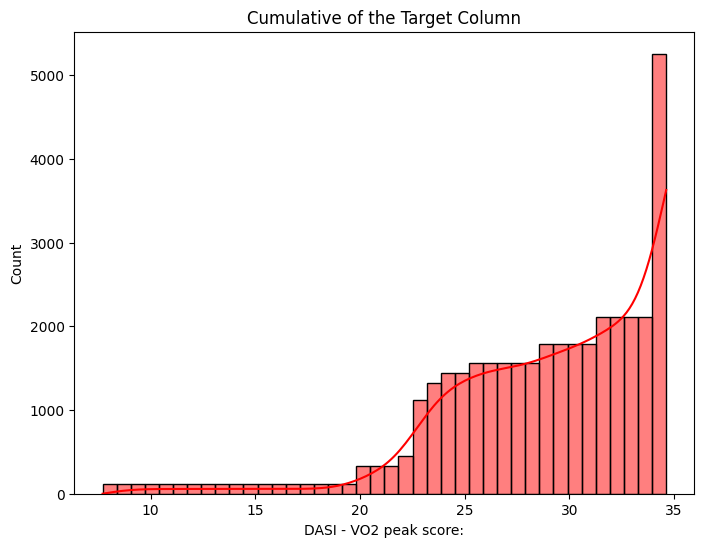

In [ ]:
plt.figure(figsize = (8,6))
sns.histplot(dataset[target],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

Epoch 1/100
66/66 [==============================] - 1s 5ms/step - loss: 141944.3906 - val_loss: 1604.0353
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 1807.3883 - val_loss: 1225.2220
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 1490.6265 - val_loss: 1142.7887
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 1306.3545 - val_loss: 1108.0422
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 1203.5428 - val_loss: 1086.8217
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 1129.5253 - val_loss: 1067.3870
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 1086.3445 - val_loss: 1044.7188
Epoch 8/100
66/66 [==============================] - 0s 3ms/step - loss: 1054.1279 - val_loss: 1024.4834
Epoch 9/100
66/66 [==============================] - 0s 2ms/step - loss: 1027.8341 - val_loss: 1005.0892
Epoch 10/100
66/66 [==============================] -

<Axes: >

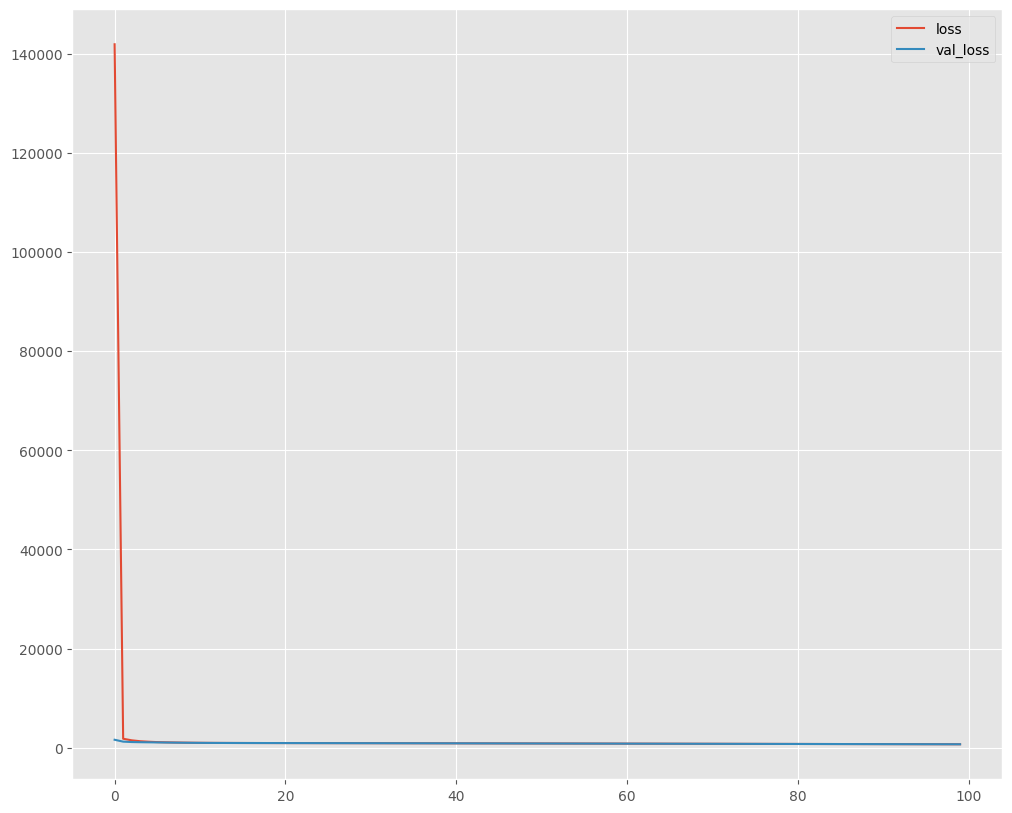

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))   # Adding Output Layer
#If we make a regression with neural networks, we do not need to add an activation function compared to classification problems

ann.compile(optimizer="adam",loss="mean_squared_error")
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=64,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

#pd.DataFrame(ann.history.history)

plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))


In [ ]:
ann.evaluate(X_train,y_train)

132/132 [==============================] - 0s 1ms/step - loss: 692.0814


692.0813598632812

In [ ]:
ann.evaluate(X_test,y_test)

33/33 [==============================] - 0s 2ms/step - loss: 692.1532


692.1531982421875

In [ ]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df

33/33 [==============================] - 0s 2ms/step


,Real Values,Predictions
0,NaN,4.746593
1,NaN,4.746593
2,NaN,4.746593
3,NaN,4.746593
4,NaN,4.746593
...,...,...
1047,NaN,4.746593
1048,NaN,4.746593
1049,NaN,4.746593
1050,NaN,4.746593


Text(0, 0.5, 'Actual Values')

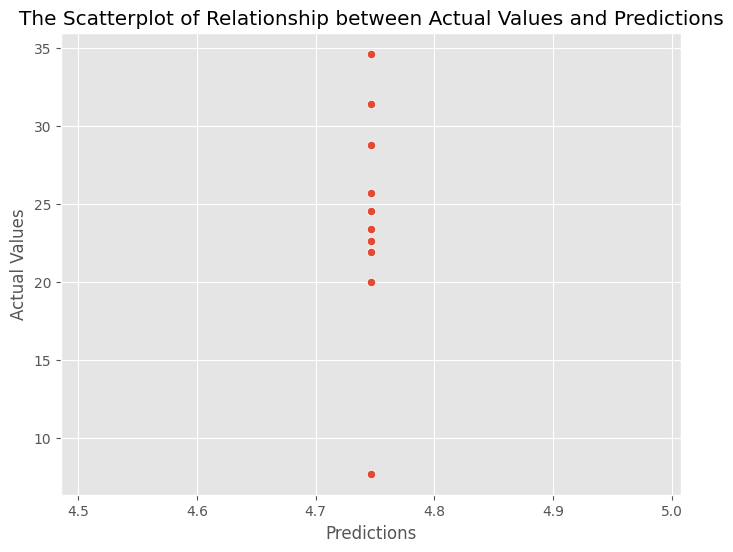

In [ ]:
# here I will visualize the real test values(y_test) versus the predicted values.
plt.figure(figsize=(8,6))
sns.scatterplot(x = np.ravel(predictions),y = y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
#It seems that our model predicts very well

In [ ]:
print("Training")
pred_train= ann.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= ann.predict(X_test)
res(y_test,pred_test)

Training
132/132 [==============================] - 0s 2ms/step
Mean absolute error = 25.56
Mean squared error = 692.08
Median absolute error = 29.88
Explain variance score = 0.0
R2 score = -16.91
Testing
33/33 [==============================] - 0s 2ms/step
Mean absolute error = 25.53
Mean squared error = 692.15
Median absolute error = 29.88
Explain variance score = 0.0
R2 score = -16.05
